In [1]:
import numpy as np
import matplotlib.pyplot as plt

from params import MetabolicNetwork

In [5]:
# Create time points (6 hours = 360 minutes)
t = np.linspace(0, 120, 1000)

# SMM-based protein intake (130g)
network_smm = MetabolicNetwork()
network_smm.set_initial_concentrations("smm_based")
network_smm.simulate(t)

# Conventional protein intake (200g)
network_conv = MetabolicNetwork()
network_conv.set_initial_concentrations("conventional")
network_conv.simulate(t)

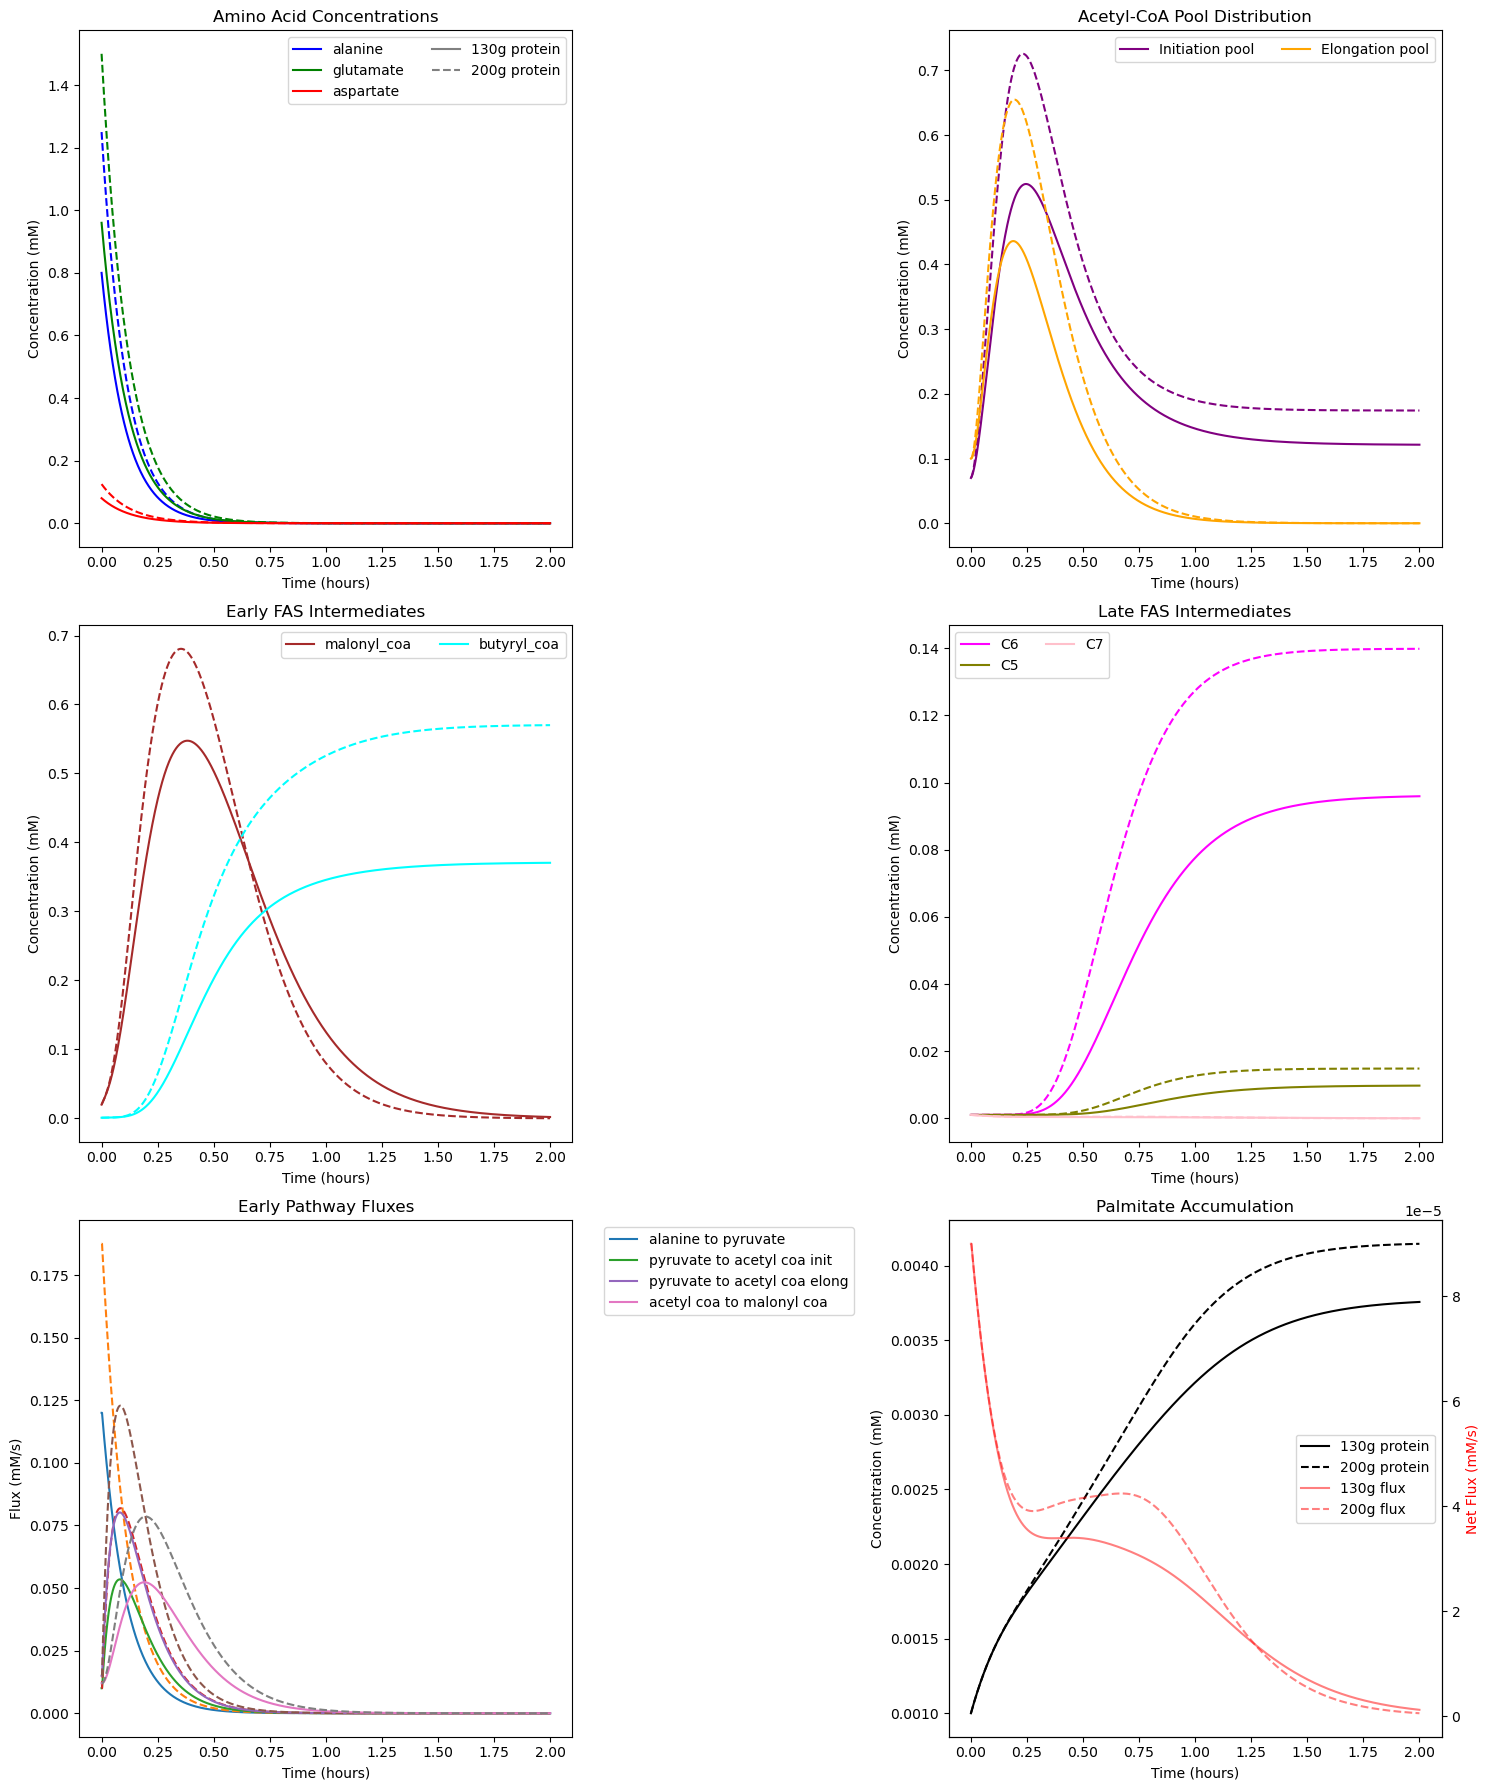

In [6]:

# Create plots (3x2 grid)
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Define colors for metabolites
color_dict = {
    'alanine': 'blue',
    'glutamate': 'green',
    'aspartate': 'red',
    'acetyl_coa_init': 'purple',
    'acetyl_coa_elong': 'orange',
    'malonyl_coa': 'brown',
    'butyryl_coa': 'cyan',
    'octanoyl_coa': 'magenta',
    'lauroyl_coa': 'olive',
    'palmitoyl_coa': 'pink',
    'palmitate': 'black'
}

# 1. Amino Acids Plot
for met_name in ['alanine', 'glutamate', 'aspartate']:
    color = color_dict[met_name]
    axes[0,0].plot(t/60, network_smm.concentration_history[met_name], 
                    label=met_name, color=color)
    axes[0,0].plot(t/60, network_conv.concentration_history[met_name], 
                    linestyle='--', color=color)
axes[0,0].set_title('Amino Acid Concentrations')
axes[0,0].set_xlabel('Time (hours)')
axes[0,0].set_ylabel('Concentration (mM)')
axes[0,0].plot([], [], color='gray', label='130g protein', linestyle='-')
axes[0,0].plot([], [], color='gray', label='200g protein', linestyle='--')
axes[0,0].legend(ncol=2)

# 2. Acetyl-CoA Branching
for met_name in ['acetyl_coa_init', 'acetyl_coa_elong']:
    color = color_dict[met_name]
    label = 'Initiation' if 'init' in met_name else 'Elongation'
    axes[0,1].plot(t/60, network_smm.concentration_history[met_name], 
                    label=f'{label} pool', color=color)
    axes[0,1].plot(t/60, network_conv.concentration_history[met_name], 
                    linestyle='--', color=color)
axes[0,1].set_title('Acetyl-CoA Pool Distribution')
axes[0,1].set_xlabel('Time (hours)')
axes[0,1].set_ylabel('Concentration (mM)')
axes[0,1].legend(ncol=2)

# 3. Early FAS Intermediates
early_fas = ['malonyl_coa', 'butyryl_coa']
for met_name in early_fas:
    color = color_dict[met_name]
    axes[1,0].plot(t/60, network_smm.concentration_history[met_name], 
                    label=met_name, color=color)
    axes[1,0].plot(t/60, network_conv.concentration_history[met_name], 
                    linestyle='--', color=color)
axes[1,0].set_title('Early FAS Intermediates')
axes[1,0].set_xlabel('Time (hours)')
axes[1,0].set_ylabel('Concentration (mM)')
axes[1,0].legend(ncol=2)

# 4. Late FAS Intermediates
late_fas = ['octanoyl_coa', 'lauroyl_coa', 'palmitoyl_coa']
for met_name in late_fas:
    color = color_dict[met_name]
    carbon_num = len(met_name.split("_")[0]) - 2  # Convert name to carbon number
    label = f'C{carbon_num}'
    axes[1,1].plot(t/60, network_smm.concentration_history[met_name], 
                    label=label, color=color)
    axes[1,1].plot(t/60, network_conv.concentration_history[met_name], 
                    linestyle='--', color=color)
axes[1,1].set_title('Late FAS Intermediates')
axes[1,1].set_xlabel('Time (hours)')
axes[1,1].set_ylabel('Concentration (mM)')
axes[1,1].legend(ncol=2)

# 5. Pathway Fluxes - Early Steps
early_reactions = ['alanine_to_pyruvate', 'pyruvate_to_acetyl_coa_init', 
                    'pyruvate_to_acetyl_coa_elong', 'acetyl_coa_to_malonyl_coa']
for rxn_name in early_reactions:
    axes[2,0].plot(t/60, network_smm.flux_history[rxn_name], 
                    label=rxn_name.replace('_', ' '))
    axes[2,0].plot(t/60, network_conv.flux_history[rxn_name], 
                    linestyle='--')
axes[2,0].set_title('Early Pathway Fluxes')
axes[2,0].set_xlabel('Time (hours)')
axes[2,0].set_ylabel('Flux (mM/s)')
axes[2,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 6. Final Product Accumulation and Net Flux
# Plot palmitate concentration
ax_palm = axes[2,1]
color = color_dict['palmitate']
ax_palm.plot(t/60, network_smm.concentration_history['palmitate'], 
            label='130g protein', color=color)
ax_palm.plot(t/60, network_conv.concentration_history['palmitate'], 
            label='200g protein', linestyle='--', color=color)
ax_palm.set_title('Palmitate Accumulation')
ax_palm.set_xlabel('Time (hours)')
ax_palm.set_ylabel('Concentration (mM)', color=color)

# Add net flux to same plot with secondary y-axis
ax_flux = ax_palm.twinx()
flux_color = 'red'
ax_flux.plot(t/60, network_smm.flux_history['palmitoyl_to_palmitate'], 
            label='130g flux', color=flux_color, alpha=0.5)
ax_flux.plot(t/60, network_conv.flux_history['palmitoyl_to_palmitate'], 
            label='200g flux', linestyle='--', color=flux_color, alpha=0.5)
ax_flux.set_ylabel('Net Flux (mM/s)', color=flux_color)

# Combine legends
lines_palm, labels_palm = ax_palm.get_legend_handles_labels()
lines_flux, labels_flux = ax_flux.get_legend_handles_labels()
ax_palm.legend(lines_palm + lines_flux, labels_palm + labels_flux, loc='center right')

plt.tight_layout()
plt.show()
